# **Introduction**

Water quality describes the condition of the water, including chemical, physical, and biological characteristics, usually with respect to its suitability for a particular purpose such as drinking or swimming
Drinking water quality varies from place to place, depending on the condition of the source water from which it is drawn and the treatment it receives, but it must meet U.S. Environmental Protection Agency (EPA) regulations.

This dataset contains 10 columns which correspond to 10 features.

# **Features description**



**ph**: pH of 1. water (0 to 14). WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.

**Hardness**: Capacity of water to precipitate soap caused by Calcium and Magnesium in mg/L. We can determine the water’s hardness based on these concentrations of calcium carbonate:


*   below 75 mg/L - is generally considered soft
*   76 to 150 mg/L - moderately hard
*   151 to 300 mg/L - hard
*   more than 300 mg/ - very hard


**Solids**: Total dissolved solids in ppm (parts per million) such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose

**Chloramines**: Amount of Chloramines in ppm. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**Sulfate**: Amount of Sulfates dissolved in mg/L. It ranges from 3 to 30 mg/L in most freshwater supplies.

**Conductivity**: Electrical conductivity of water in μS/cm. According to WHO standards, EC value should not exceeded 400 μS/cm

**Organic_carbon**: Amount of organic carbon in ppm. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**Trihalomethanes**: Amount of Trihalomethanes in μg/L. THM levels up to 80 ppm is considered safe in drinking water

**Turbidity**: Measure of light emiting property of water in NTU. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU

**Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

The isue that determines the potability of water is a question of life and health. Therefore, the decision of drinking water should be taken very carefully. To solve this problem, a lot of domain knowledge is needed.
we have is a brief description of the characteristics for drinking water. The aim of this project is to create a model that understands as much as possible the given dataset in order to predict the potability of the water.

# Import data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


First we made a copy of the data.

In [ ]:
water_potab=data.copy()
water_potab.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Rename the column

In [ ]:
water_potab = water_potab.rename(columns={"Organic_carbon": "Organic carbon" })
water_potab.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Checking the type of the data


In [ ]:
water_potab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


We used The describe() method for the description of the data in the DataFrame.

In [ ]:
water_potab.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Dropping duplicate rows

In [ ]:
duplicate_rows_water_potab = water_potab[water_potab.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_water_potab))
print(water_potab.count())

number of duplicate rows:  0
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64


# Dropping missing values

In [ ]:
print(water_potab.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
water_potab = water_potab.dropna()    
water_potab.count()
print(water_potab.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


We plot histograme to see the distribution of the data. So we can see that most of features are normal distribution except Except for the feature solids is slightly skewed to the left.





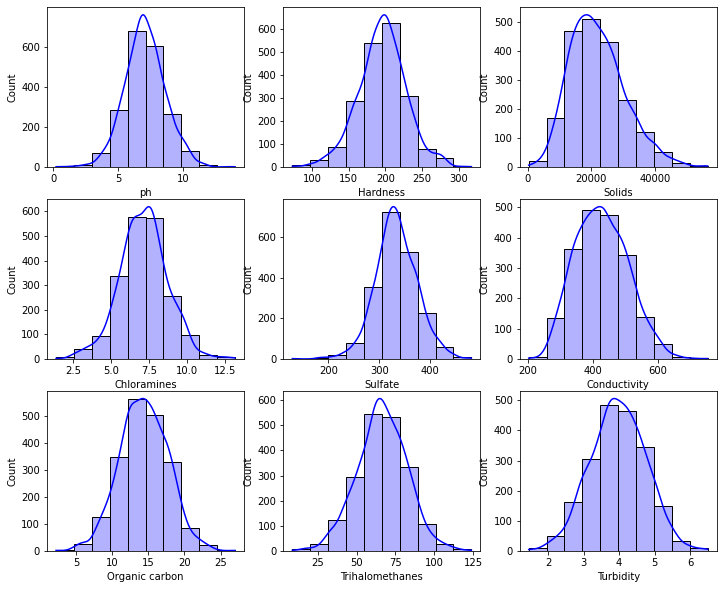

In [ ]:
plt.figure(figsize=(12,10))

for i, column in enumerate(water_potab.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.histplot(water_potab[column],kde=True,alpha=0.3, bins=10, color='blue',common_norm=False)


In [ ]:
water_potab.skew().sort_values(ascending = False)

Solids             0.595894
Potability         0.394614
Conductivity       0.266869
ph                 0.048947
Chloramines        0.012976
Organic carbon    -0.020018
Turbidity         -0.033051
Sulfate           -0.046558
Trihalomethanes   -0.051422
Hardness          -0.085237
dtype: float64

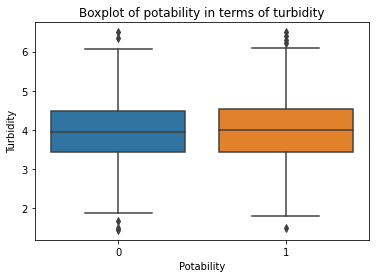

In [ ]:
import seaborn as sns
sns.boxplot(x=water_potab['Potability'],y= water_potab['Turbidity'])
plt.title('Boxplot of potability in terms of turbidity')
plt.show()

Boxplot show us the distribution of numerical data and skewness and to detect outliers.
We can see the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.

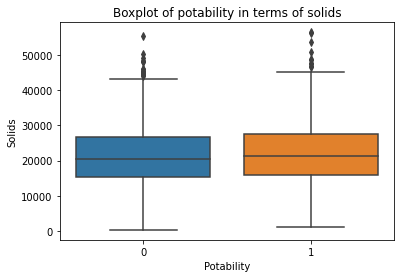

In [ ]:
import seaborn as sns
sns.boxplot(x=water_potab['Potability'],y= water_potab['Solids'])
plt.title('Boxplot of potability in terms of solids')
plt.show()

# Checking distribution of potability



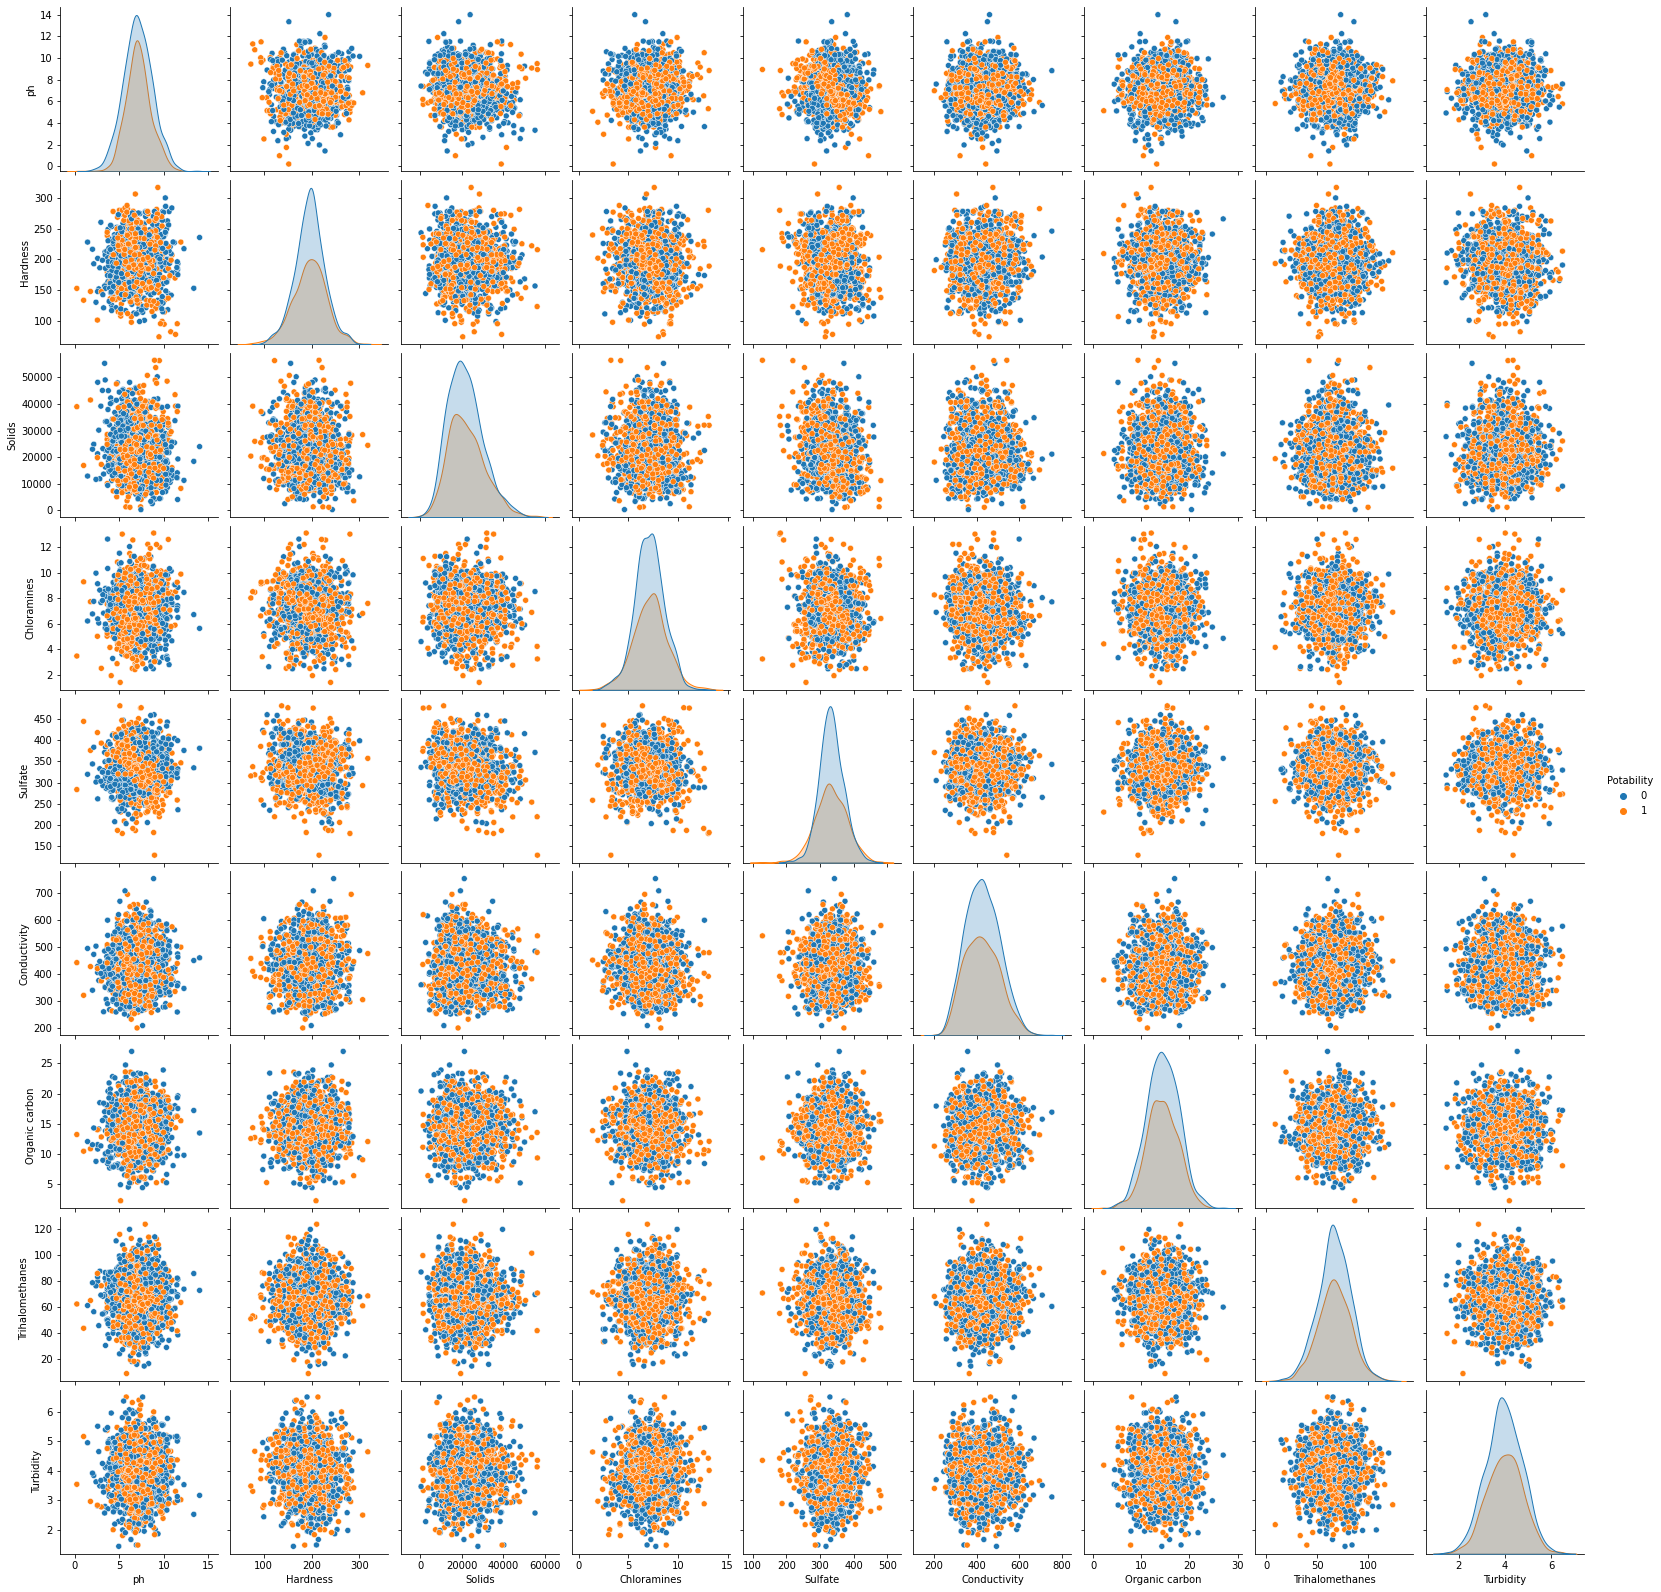

In [ ]:
sns.pairplot(water_potab, hue ='Potability')

We checked the distribution of potability: 1: potable and 0: no potable.

In [ ]:
target_column = "Potability"
water_potab[target_column].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

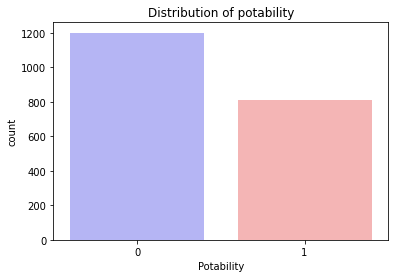

In [ ]:
sns.countplot(x="Potability", data=water_potab, palette="bwr")
plt.title('Distribution of potability')
plt.show()



Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. Values close to 1 means the variables are positively correlated which indicate that one variable increases so does the other and here we can see a positive correlation between ph and Hardness with 0.11 and a correlation between solids and potability with 0.041. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases, in our case we can see a negatif correlation between Hardness and Sulfate with -0.11.


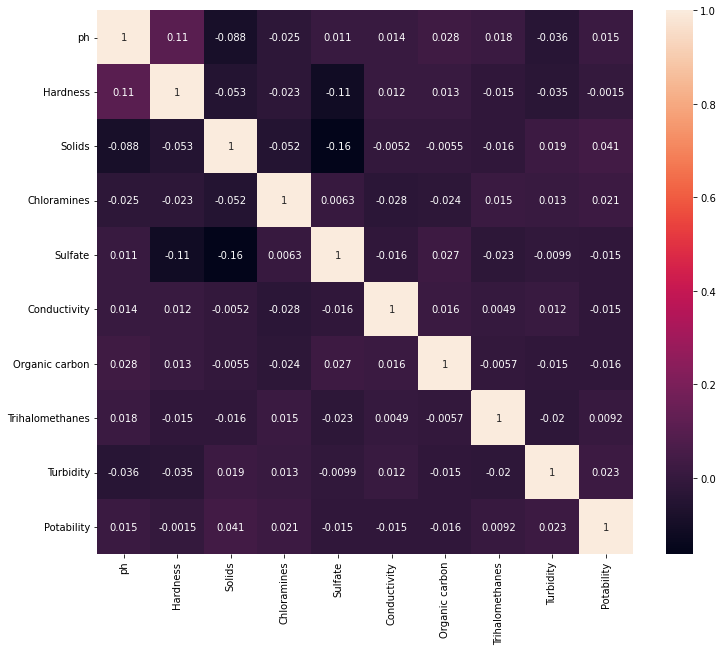

In [ ]:
plt.figure(figsize=(12,10))
cor = water_potab.corr()
sns.heatmap(cor, annot=True)
plt.show()

# Separate the data and the target

In [ ]:
target_name = "Potability"
y = water_potab[target_name]
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [ ]:
x = water_potab.drop(columns=[target_name, ])


In [ ]:
feature_names = x.columns
feature_names

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
print(f"The dataset contains {x.shape[0]} samples and "
      f"{x.shape[1]} features")

The dataset contains 2011 samples and 9 features


# Train-test split the dataset

we’re going to use the traintestsplit function from sklearn model_selection library to split the dataset.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,
 test_size=0.25)

In [ ]:
print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))

x_train shape: (1508, 9)
x_test shape: (503, 9)


# Fit a model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
accuracy = model.score(x_test, y_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.618


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print("training score: {:.2f}".format(model.score(x_train, y_train)))
print("test score: {:.2f}".format(model.score(x_test, y_test)))

training score: 0.59
test score: 0.62


# Decision Tree

Now let’s create the classification decision tree using the DecisionTreeClassifier function from the sklearn.tree library.

Although the DecisionTreeClassifier function has many parameters that I choosed max_depth, random_state, ccp_alpha.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2, random_state=0, ccp_alpha=0.0)
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Now we are going to train the model with the training datasets, we fit the model and the algorithm would already be fully trained.

In [ ]:
clf=clf.fit(x_train,y_train)

In [ ]:
predictions=clf.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6322067594433399

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[284,  25],
       [160,  34]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions, target_names=['potable', 'no potable']))

              precision    recall  f1-score   support

     potable       0.64      0.92      0.75       309
  no potable       0.58      0.18      0.27       194

    accuracy                           0.63       503
   macro avg       0.61      0.55      0.51       503
weighted avg       0.62      0.63      0.57       503



In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.18640366, 0.        , 0.81359634,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
feature_importance=pd.DataFrame(clf.feature_importances_, index=feature_names)
feature_importance

,0
ph,0.000000
Hardness,0.000000
Solids,0.186404
Chloramines,0.000000
Sulfate,0.813596
Conductivity,0.000000
Organic carbon,0.000000
Trihalomethanes,0.000000
Turbidity,0.000000


We can see that solids and sulfates are the responsible features that can affect the water quality.

In [ ]:
feature=list(feature_importance[feature_importance[0]>0].index)
feature

['Solids', 'Sulfate']

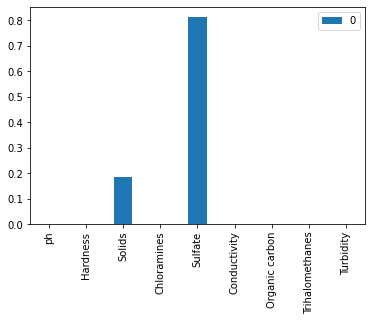

In [ ]:
feature_importance.head(10).plot(kind='bar')

# Visualize Decision Trees for Classification

The graph showed the most significant nodes that maximize the output and will help us determine, if applicable, some useful trading rules.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


In [ ]:
dt = water_potab.drop(['Potability'], axis=1)
tr = water_potab['Potability']

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(dt, tr)

r = export_text(decision_tree, feature_names = list(dt.columns.values), show_weights=True)

print(r)

|--- Sulfate <= 260.92
|   |--- Solids <= 18346.62
|   |   |--- weights: [12.00, 5.00] class: 0
|   |--- Solids >  18346.62
|   |   |--- weights: [9.00, 51.00] class: 1
|--- Sulfate >  260.92
|   |--- Sulfate <= 387.33
|   |   |--- weights: [1096.00, 655.00] class: 0
|   |--- Sulfate >  387.33
|   |   |--- weights: [83.00, 100.00] class: 1



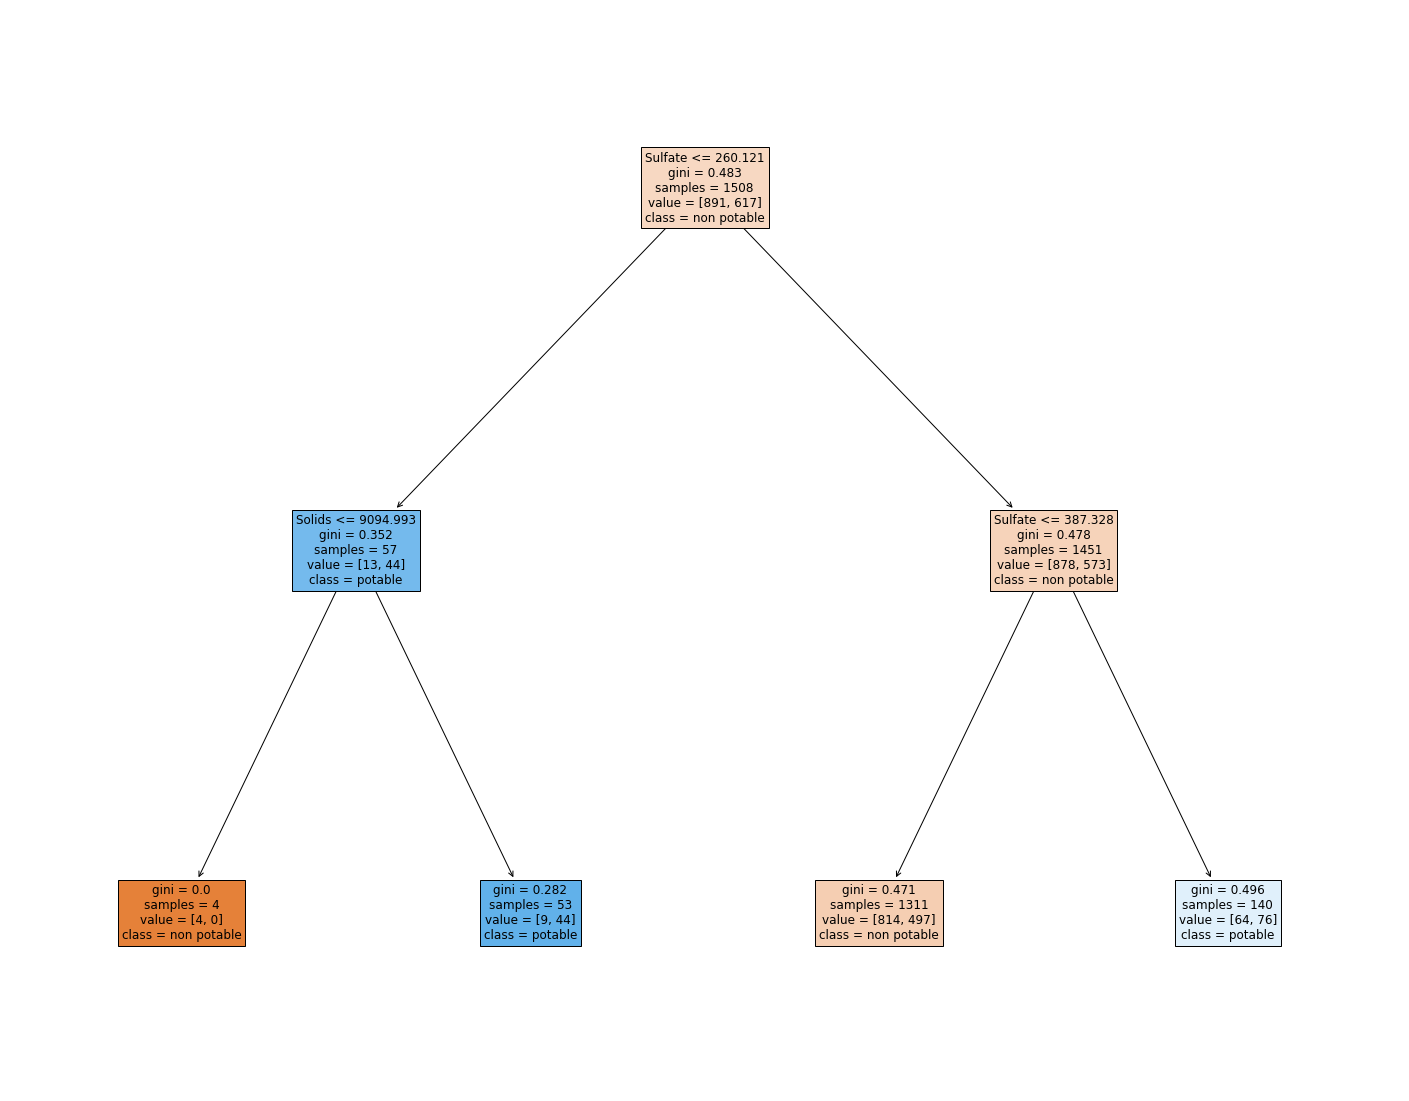

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf, feature_names=feature_names, class_names={0:'non potable', 1:'potable'}, filled=True, fontsize=12)